# Loading Libraries

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(caret)
library(ggcorrplot)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




# Importing Dataset

In [2]:
# Load the dataset from a CSV file
diabetes <- read.csv("Diabetes Dataset.csv", header = TRUE)

# Summary and Dividing the dataframe into two parts

In [47]:
str(diabetes)

'data.frame':	1000 obs. of  14 variables:
 $ ID       : int  502 420 680 634 721 759 636 788 82 132 ...
 $ No_Pation: int  17975 47975 87656 34224 34225 34230 34231 34232 46815 34234 ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ AGE      : int  50 50 50 45 50 32 31 33 30 45 ...
 $ Urea     : num  4.7 4.7 4.7 2.3 2 3.6 4.4 3.3 3 4.6 ...
 $ Cr       : int  46 46 46 24 50 28 55 53 42 54 ...
 $ HbA1c    : num  4.9 4.9 4.9 4 4 4 4.2 4 4.1 5.1 ...
 $ Chol     : num  4.2 4.2 4.2 2.9 3.6 3.8 3.6 4 4.9 4.2 ...
 $ TG       : num  0.9 0.9 0.9 1 1.3 2 0.7 1.1 1.3 1.7 ...
 $ HDL      : num  2.4 2.4 2.4 1 0.9 2.4 1.7 0.9 1.2 1.2 ...
 $ LDL      : num  1.4 1.4 1.4 1.5 2.1 3.8 1.6 2.7 3.2 2.2 ...
 $ VLDL     : num  0.5 0.5 0.5 0.4 0.6 1 0.3 1 0.5 0.8 ...
 $ BMI      : num  24 24 24 21 24 24 23 21 22 23 ...
 $ CLASS    : chr  "N" "N" "N" "N" ...


In [44]:
# Check for null values by column in Diabetes Dataset
colSums(is.na(diabetes))



ID No_Pation    Gender       AGE      Urea        Cr     HbA1c      Chol 
        0         0         0         0         0         0         0         0 
       TG       HDL       LDL      VLDL       BMI     CLASS 
        0         0         0         0         0         0

In [5]:
# Create a subset for N and Y
diabetes_y_n <- subset(diabetes, CLASS %in% c("N", "Y"))

# Create a subset for P
diabetes_p <- subset(diabetes, CLASS == "P")


In [6]:
diabetes_y_n

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
4,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21,N
5,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24,N
6,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24,N
7,636,34231,F,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23,N
8,788,34232,F,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21,N
9,82,46815,F,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22,N


In [7]:
diabetes_p

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
104,4,34301,F,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P
105,496,56826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,P
106,684,87658,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
107,366,11826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
108,399,47513,F,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P
109,500,23513,F,39,3.0,46,6.4,4.7,1.3,1.10,3.10,0.6,24.0,P
110,690,87661,F,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P
111,466,26665,F,30,5.7,53,6.0,5.4,1.7,1.40,3.30,0.7,22.0,P
112,686,87659,F,33,2.7,47,6.0,4.2,1.4,1.30,2.60,0.7,24.0,P


In [8]:
# To View the summary statistics of the dataset
summary(diabetes_y_n)

       ID          No_Pation           Gender               AGE      
 Min.   :  1.0   Min.   :     123   Length:947         Min.   :20.0  
 1st Qu.:125.0   1st Qu.:   24064   Class :character   1st Qu.:51.0  
 Median :295.0   Median :   34390   Mode  :character   Median :55.0  
 Mean   :337.4   Mean   :  282095                      Mean   :54.1  
 3rd Qu.:546.5   3rd Qu.:   45370                      3rd Qu.:59.0  
 Max.   :800.0   Max.   :75435657                      Max.   :79.0  
      Urea              Cr            HbA1c             Chol       
 Min.   : 0.500   Min.   :  6.0   Min.   : 0.900   Min.   : 0.000  
 1st Qu.: 3.700   1st Qu.: 48.0   1st Qu.: 6.800   1st Qu.: 4.000  
 Median : 4.600   Median : 60.0   Median : 8.100   Median : 4.800  
 Mean   : 5.159   Mean   : 69.1   Mean   : 8.409   Mean   : 4.879  
 3rd Qu.: 5.700   3rd Qu.: 73.0   3rd Qu.:10.200   3rd Qu.: 5.600  
 Max.   :38.900   Max.   :800.0   Max.   :16.000   Max.   :10.300  
       TG              HDL        

In [9]:
unique(diabetes_y_n[["CLASS"]])


[1] "N" "Y"

In [10]:
unique(diabetes_p[["CLASS"]])


[1] "P"

# Converting Char data to Integer

In [11]:
# Convert Gender to binary
diabetes_y_n$Gender <- as.numeric(diabetes_y_n$Gender == "M")

# Convert CLASS to binary
diabetes_y_n$CLASS <- as.numeric(diabetes_y_n$CLASS == "Y")


In [12]:
diabetes_y_n

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,0
4,634,34224,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21,0
5,721,34225,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24,0
6,759,34230,0,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24,0
7,636,34231,0,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23,0
8,788,34232,0,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21,0
9,82,46815,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22,0


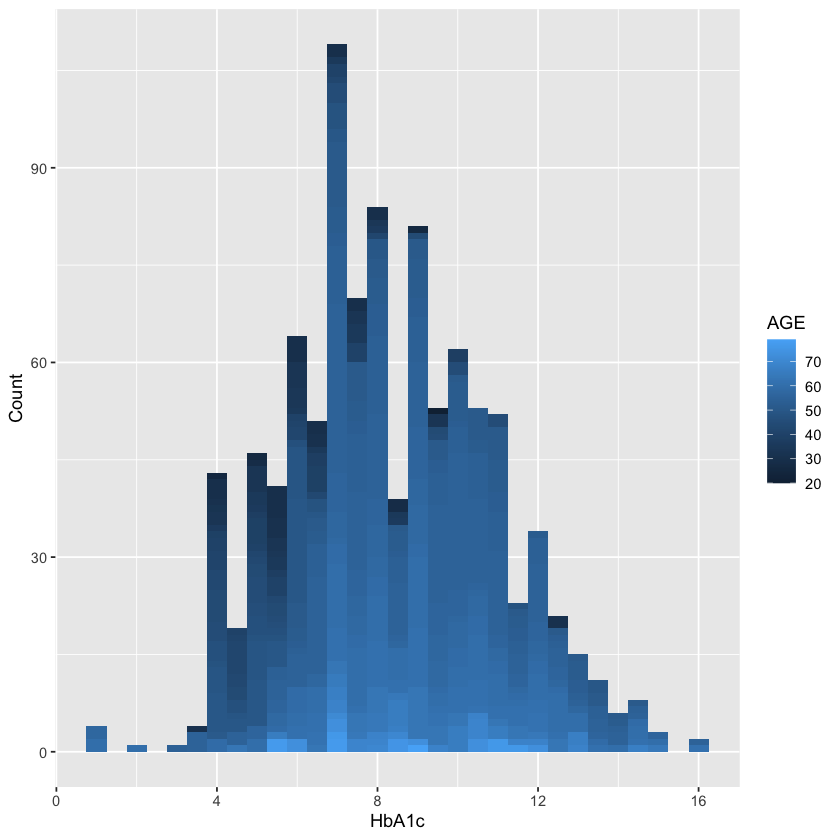

In [13]:
ggplot(data = diabetes, aes(x = HbA1c, fill = AGE, group = AGE)) +
  geom_histogram(binwidth = 0.5) +
  labs(x = "HbA1c", y = "Count", fill = "AGE")


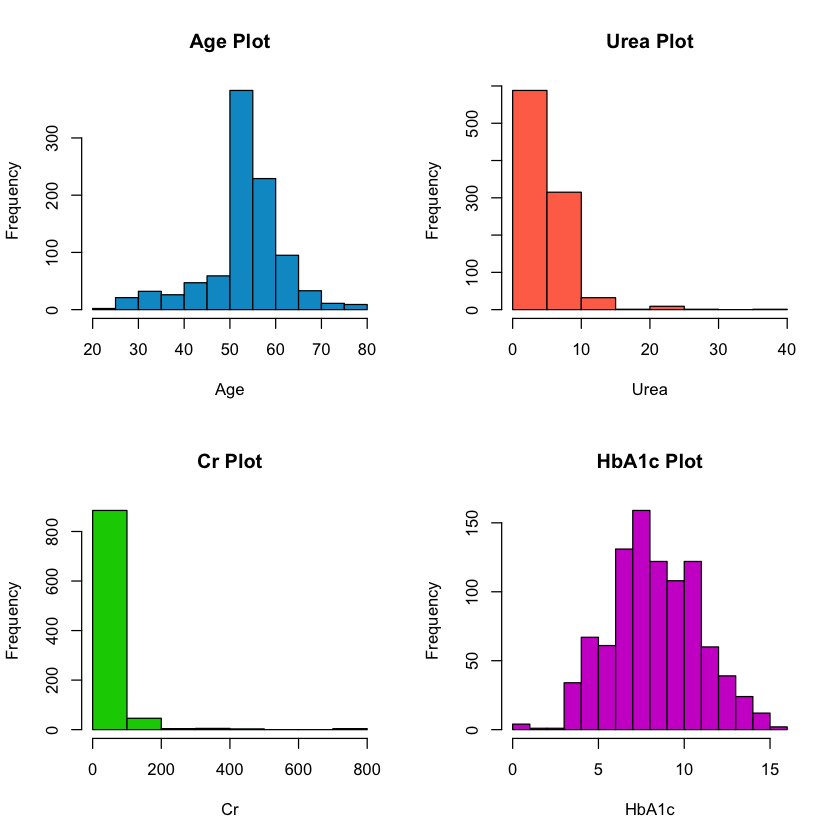

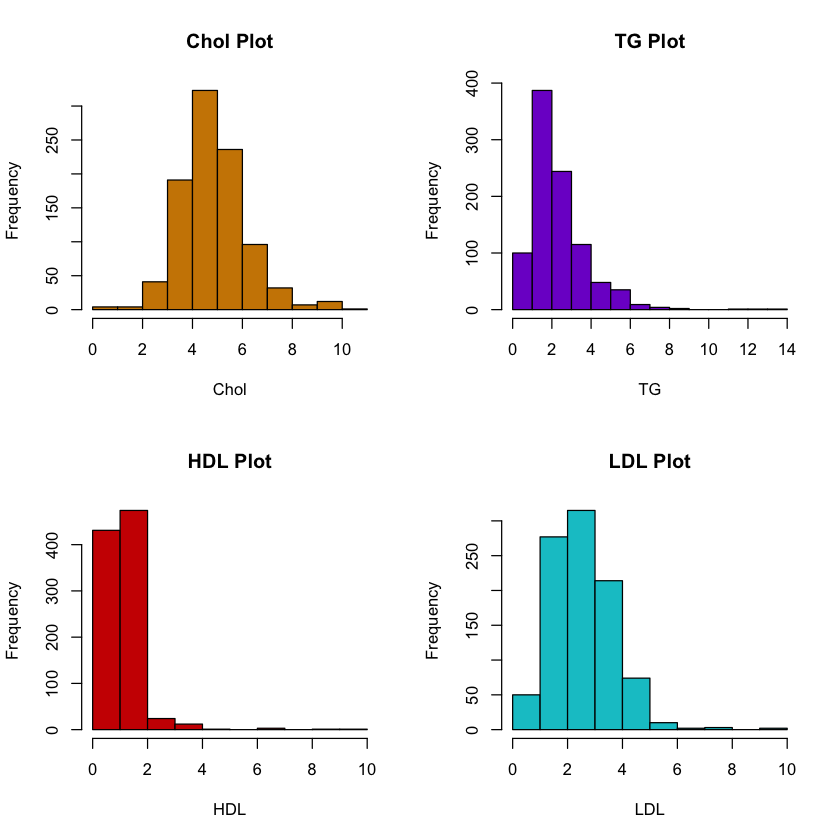

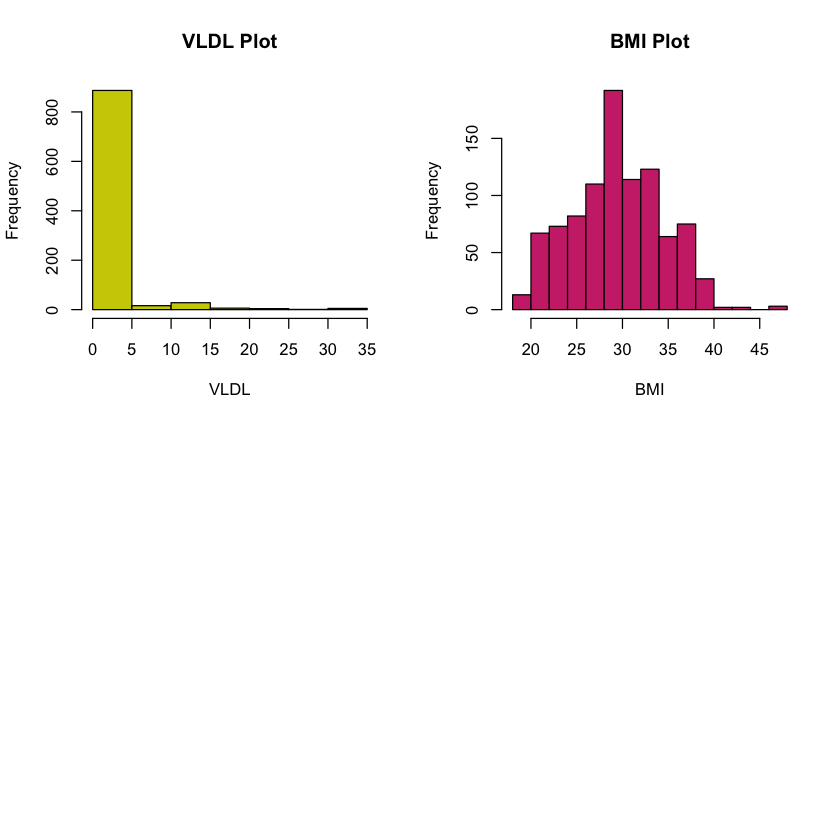

In [14]:
# Create a vector of colors
colors <- c("deepskyblue3", "coral1", "green3", "magenta3", "orange3",
            "purple3", "red3", "turquoise3", "yellow3", "violetred3")

# Create a histogram of each variable with different colors
par(mfrow=c(2,2))
hist(diabetes_y_n$AGE, main="Age Plot", xlab="Age", col=colors[1])
hist(diabetes_y_n$Urea, main="Urea Plot", xlab="Urea", col=colors[2])
hist(diabetes_y_n$Cr, main="Cr Plot", xlab="Cr", col=colors[3])
hist(diabetes_y_n$HbA1c, main="HbA1c Plot", xlab="HbA1c", col=colors[4])
hist(diabetes_y_n$Chol, main="Chol Plot", xlab="Chol", col=colors[5])
hist(diabetes_y_n$TG, main="TG Plot", xlab="TG", col=colors[6])
hist(diabetes_y_n$HDL, main="HDL Plot", xlab="HDL", col=colors[7])
hist(diabetes_y_n$LDL, main="LDL Plot", xlab="LDL", col=colors[8])
hist(diabetes_y_n$VLDL, main="VLDL Plot", xlab="VLDL", col=colors[9])
hist(diabetes_y_n$BMI, main="BMI Plot", xlab="BMI", col=colors[10])


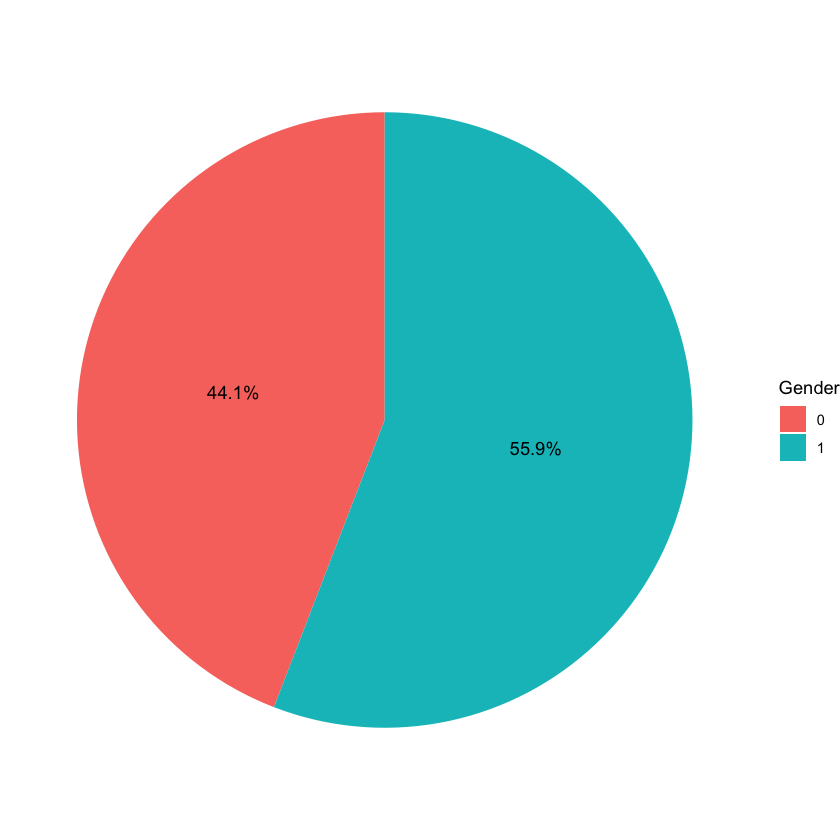

In [15]:
library(ggplot2)
library(dplyr)

# Create a new dataframe with counts of each gender
gender_counts <- diabetes_y_n %>%
  group_by(Gender) %>%
  summarise(count = n())

# Calculate the percentage of each gender
gender_counts$percentage <- round(gender_counts$count / sum(gender_counts$count) * 100, 1)

# Create a pie chart with percentage labels
ggplot(data = gender_counts, aes(x = "", y = count, fill = factor(Gender))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(percentage, "%")), position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  labs(x = NULL, y = NULL, fill = "Gender") +
  theme_void()




# Applying log to all variables which have a long tail in histogram

In [16]:
diabetes_y_n$log_cr <- log(diabetes_y_n$Cr)
diabetes_y_n$log_urea <- log(diabetes_y_n$Urea)
diabetes_y_n$log_age <- log(diabetes_y_n$AGE)
diabetes_y_n$log_hdl <- log(diabetes_y_n$HDL)
diabetes_y_n$log_ldl <- log(diabetes_y_n$LDL)
diabetes_y_n$log_vldl <- log(diabetes_y_n$VLDL)

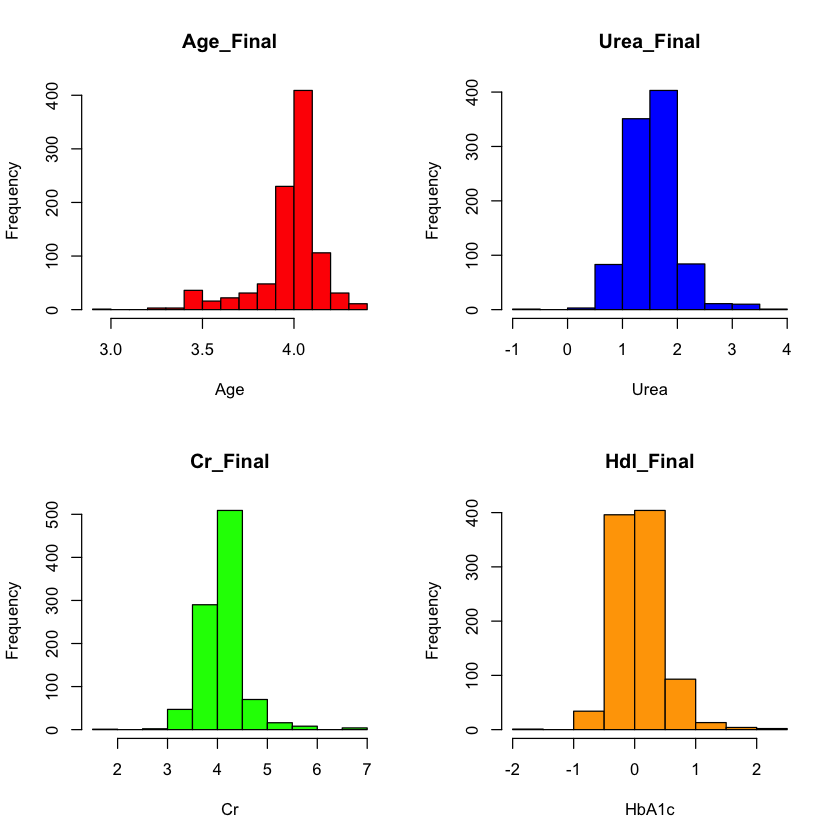

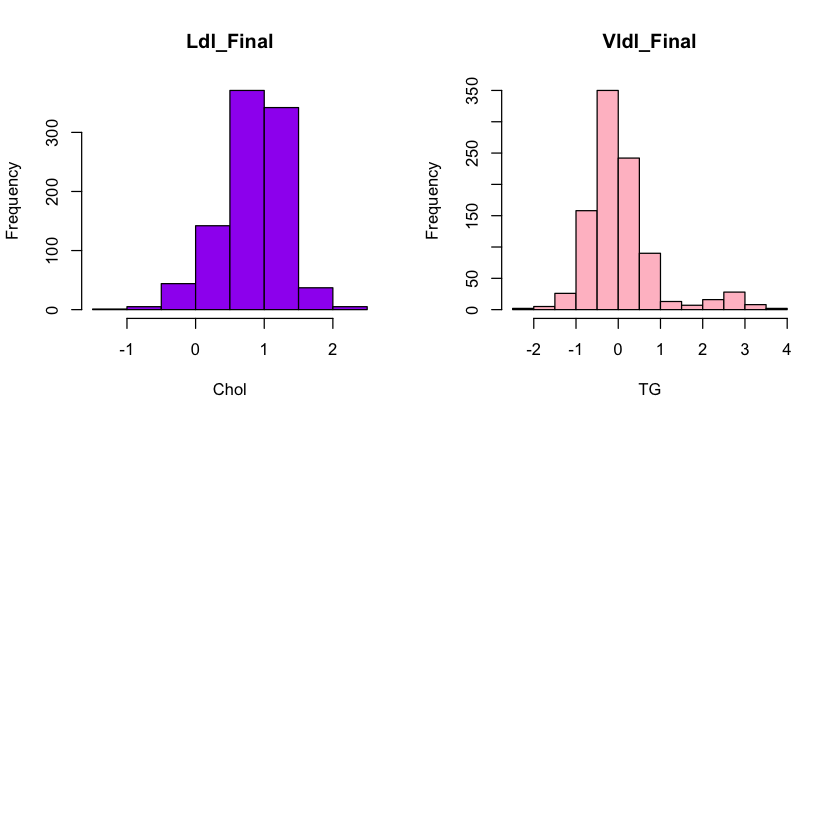

In [17]:
par(mfrow=c(2,2))
hist(diabetes_y_n$log_age, main="Age_Final", xlab="Age", col="red")
hist(diabetes_y_n$log_urea, main="Urea_Final", xlab="Urea", col="blue")
hist(diabetes_y_n$log_cr, main="Cr_Final", xlab="Cr", col="green")
hist(diabetes_y_n$log_hdl, main="Hdl_Final", xlab="HbA1c", col="orange")
hist(diabetes_y_n$log_ldl, main="Ldl_Final", xlab="Chol", col="purple")
hist(diabetes_y_n$log_vldl, main="Vldl_Final", xlab="TG", col="pink")

# correlation matrix 

[1] "Correlation Matrix of Diabetes Dataset"


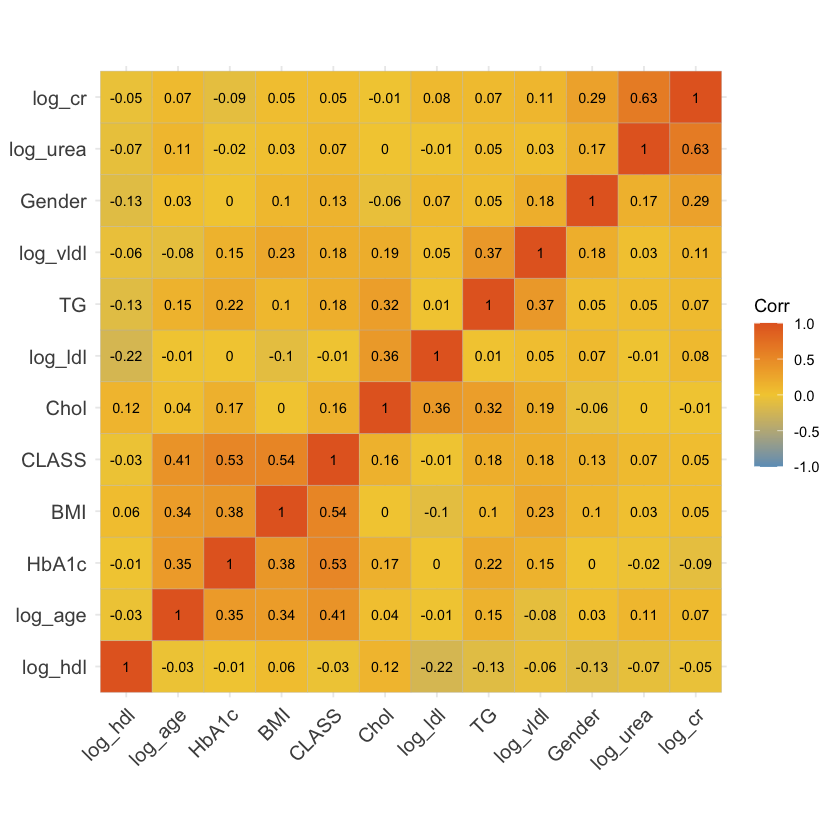

In [18]:
library(ggplot2)
library(ggcorrplot)

# Define color palette
my_colors <- c("#6D9EC1", "#F3CC3E", "#E46726")
diabetes_subset <- diabetes_y_n[,c("Gender", "log_age", "log_urea", "log_cr", "HbA1c", "Chol", "TG", "log_hdl", "log_ldl", "log_vldl", "BMI", "CLASS")]
# Calculate correlation matrix
cor_matrix <- cor(diabetes_subset)

# Create heatmap
ggcorrplot(cor_matrix, type = "full", hc.order = TRUE, lab = TRUE, lab_size = 3, colors = my_colors)
print("Correlation Matrix of Diabetes Dataset")


# Feature Selection

In [19]:
# identify the features with high correlation with the outcome variable
cor_target <- abs(cor_matrix[,"CLASS"])
relevant_features <- names(which(cor_target > 0.1)) # threshold of 0.1

In [20]:
relevant_features

[1] "Gender"   "log_age"  "HbA1c"    "Chol"     "TG"       "log_vldl" "BMI"     
[8] "CLASS"

In [21]:
#Keeping only selected columns
diabetes_selected <- diabetes_y_n[,c("Gender", "log_age", "HbA1c", "Chol", "TG", "log_vldl", "BMI", "CLASS")]


In [22]:
diabetes_selected

,Gender,log_age,HbA1c,Chol,TG,log_vldl,BMI,CLASS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3.912023,4.9,4.2,0.9,-0.6931472,24,0
2,0,3.912023,4.9,4.2,0.9,-0.6931472,24,0
3,0,3.912023,4.9,4.2,0.9,-0.6931472,24,0
4,0,3.806662,4.0,2.9,1.0,-0.9162907,21,0
5,0,3.912023,4.0,3.6,1.3,-0.5108256,24,0
6,0,3.465736,4.0,3.8,2.0,0.0000000,24,0
7,0,3.433987,4.2,3.6,0.7,-1.2039728,23,0
8,0,3.496508,4.0,4.0,1.1,0.0000000,21,0
9,0,3.401197,4.1,4.9,1.3,-0.6931472,22,0


In [23]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(diabetes_selected$CLASS, SplitRatio = 0.80)
X = subset(diabetes_selected, split == TRUE)
y = subset(diabetes_selected, split == FALSE)

In [24]:
# Feature Scaling
X[-8] = scale(X[-8])
y[-8] = scale(y[-8])

In [25]:
X

,Gender,log_age,HbA1c,Chol,TG,log_vldl,BMI,CLASS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.118625,-0.3352281,-1.370313,-0.51285515,-1.0536929,-0.9600933,-1.190313,0
2,-1.118625,-0.3352281,-1.370313,-0.51285515,-1.0536929,-0.9600933,-1.190313,0
3,-1.118625,-0.3352281,-1.370313,-0.51285515,-1.0536929,-0.9600933,-1.190313,0
6,-1.118625,-2.7953120,-1.725062,-0.82492568,-0.2328319,-0.1068216,-1.190313,0
7,-1.118625,-2.9703215,-1.646229,-0.98096095,-1.2029403,-1.5889252,-1.396294,0
9,-1.118625,-3.1510699,-1.685646,0.03326829,-0.7551980,-0.9600933,-1.602275,0
10,-1.118625,-0.9160105,-1.291480,-0.51285515,-0.4567031,-0.3815138,-1.396294,0
12,-1.118625,-0.3352281,-1.173230,0.34533882,-1.1283166,-1.5889252,-1.808256,0
13,-1.118625,-3.1510699,-1.685646,0.03326829,-0.7551980,-0.9600933,-1.602275,0


# Training using Logistic Regression

In [26]:
# Fitting Logistic Regression to the Training set
classifier = glm(formula = CLASS ~ .,
                 family = binomial,
                 data = X)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [27]:
# Predicting the Test set results
prob_pred = predict(classifier, type = 'response', newdata = y[-8])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [28]:
# Making the Confusion Matrix
cm = table(y[, 8], y_pred > 0.5)

In [29]:
cm

   
    FALSE TRUE
  0    18    3
  1     4  165

In [30]:
# Calculate true positive, false positive, true negative, and false negative counts
tp <- sum(y_pred == 1 & y$CLASS == 1)
fp <- sum(y_pred == 1 & y$CLASS == 0)
tn <- sum(y_pred == 0 & y$CLASS == 0)
fn <- sum(y_pred == 0 & y$CLASS == 1)

# Calculate precision, recall, F1 score & Accuracy
precision <- tp / (tp + fp)
recall <- tp / (tp + fn)
f1_score <- 2 * (precision * recall) / (precision + recall)
accuracy <- sum(y_pred == y$CLASS)/nrow(y)*100

# Print the results
cat("True positive count:", tp, "\n")
cat("False positive count:", fp, "\n")
cat("True negative count:", tn, "\n")
cat("False negative count:", fn, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 score:", f1_score, "\n")
cat("Accuracy:", accuracy,"\n")


True positive count: 165 
False positive count: 3 
True negative count: 18 
False negative count: 4 
Precision: 0.9821429 
Recall: 0.9763314 
F1 score: 0.9792285 
Accuracy: 96.31579 


# Predicting the Diabetes==’P’ cases

In [31]:
diabetes_p

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
104,4,34301,F,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P
105,496,56826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,P
106,684,87658,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
107,366,11826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
108,399,47513,F,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P
109,500,23513,F,39,3.0,46,6.4,4.7,1.3,1.10,3.10,0.6,24.0,P
110,690,87661,F,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P
111,466,26665,F,30,5.7,53,6.0,5.4,1.7,1.40,3.30,0.7,22.0,P
112,686,87659,F,33,2.7,47,6.0,4.2,1.4,1.30,2.60,0.7,24.0,P


In [32]:
unique(diabetes_p$CLASS)

[1] "P"

In [33]:
diabetes_p$Gender <- ifelse(diabetes_p$Gender == "M", 1, 0)

In [34]:
diabetes_p$log_cr <- log(diabetes_p$Cr)
diabetes_p$log_urea <- log(diabetes_p$Urea)
diabetes_p$log_age <- log(diabetes_p$AGE)
diabetes_p$log_hdl <- log(diabetes_p$HDL)
diabetes_p$log_ldl <- log(diabetes_p$LDL)
diabetes_p$log_vldl <- log(diabetes_p$VLDL)

In [35]:
#Keep only selected columns
diabetes_selected_p <- diabetes_p[,c("Gender", "log_age", "HbA1c", "Chol", "TG", "log_vldl", "BMI", "CLASS")]


In [36]:
# Feature Scaling
diabetes_selected_p[-8] = scale(diabetes_selected_p[-8])

In [37]:
# Predicting the Diabetes==’P’ cases
prob_pred_p = predict(classifier, type = 'response', newdata = diabetes_selected_p[-8])
pred_p = ifelse(prob_pred_p > 0.5, 1, 0)

In [38]:
# Making the Confusion Matrix
cm = table(diabetes_selected_p[, 8], pred_p > 0.5)

In [39]:
cm

   
    FALSE TRUE
  P     1   52